In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
from pathlib import Path

In [2]:
OUTPUT_FOLDER = Path("selfmade_videos")

OUTPUT_FOLDER.mkdir(exist_ok=True)

In [3]:
def plot_function(func, range_list):
    y = [func(x) for x in range_list]
    y_span = np.max(y) - np.min(y)
    x_span = range_list[-1] - range_list[0]
    span_ratio = max(min(y_span / x_span, 2), 0.5)
    figsize = (5, 5 * span_ratio)
    fig = plt.figure(figsize=figsize)
    plt.plot(range_list, y, lw=2, zorder=0)
    plt.axis("equal")
    plt.xlabel("weight")
    plt.ylabel("loss")
    plt.tight_layout()
    return fig


def plot_deriv(func, deriv, x_range):
    y_range = [func(x) for x in x_range]
    y_deriv = [deriv(x) for x in x_range]
    for x, y, dy in zip(x_range, y_range, y_deriv):
        plot_deriv_value(x, y, 1, -dy)
        plot_deriv_tangent(x, y, 1, dy)


def plot_deriv_value(x, y, dx, dy):
    dx = 0.2 * dy
    return plt.arrow(
        x,
        y,
        dx,
        0,
        width=0.1,
        head_width=0.4,
        head_length=0.3,
        fc="r",
        ec="r",
    )


def plot_deriv_tangent(x, y, dx, dy):
    norm = np.sqrt(dx**2 + dy**2)
    dx /= norm
    dy /= norm
    x0 = x - 0.5 * dx
    y0 = y - 0.5 * dy
    x1 = x + 0.5 * dx
    y1 = y + 0.5 * dy
    return plt.plot([x0, x1], [y0, y1], "r", lw=2)

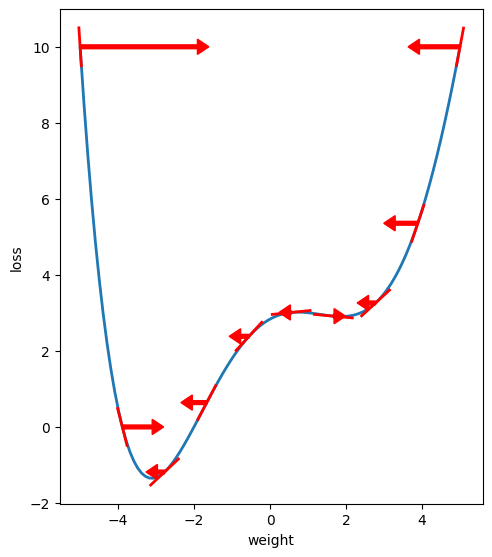

In [4]:
points = [(-5, 10), (-2, 0), (0.5, 3), (1, 3), (3, 3.5), (5, 10)]
degree = 5
x, y = zip(*points)
poly = np.polynomial.polynomial.Polynomial.fit(x, y, degree)
poly_deriv = poly.deriv()
plot_function(poly, np.linspace(-5, 5, 100))
plot_deriv(poly, poly_deriv, np.linspace(-5, 5, 10))

## Select a starting value

In [5]:
class GradientDescent:

    def __init__(self, loss, loss_deriv, start_value, learning_rate, arrow):
        self.loss = loss
        self.loss_deriv = loss_deriv
        self.current_value = start_value
        self.previous_value = None
        self.learning_rate = learning_rate
        self.last_points = []
        self.last_arrow = None
        self.arrow = arrow

    def get_current_value(self):
        return self.current_value

    def gradient_descent(self):
        gradient = self.loss_deriv(self.current_value)
        if self.arrow:
            self.last_arrow = plot_deriv_value(
                self.current_value, self.loss(self.current_value), 1, -gradient
            )
        else:
            plot_deriv_tangent(
                self.current_value, self.loss(self.current_value), 1, gradient
            )
        self.current_value -= self.learning_rate * gradient
        return gradient

    def plot_current_value(self):
        for point in self.last_points:
            point.set_sizes([point.get_sizes()[0] * 0.9])
            point.set_color("black")

        x = self.current_value
        y = self.loss(x)
        self.last_points.append(
            plt.scatter(
                x,
                y,
                c="red",
                marker="+",
                s=300,
                zorder=1,
            )
        )

    def anim_loop(self, i):
        if i % 2 == 1:
            self.gradient_descent()
        else:
            if self.arrow:
                if self.last_arrow is not None:
                    self.last_arrow.remove()
            self.plot_current_value()
        return


def animation(
    poly, poly_deriv, start_value, learning_rate, steps, filepath: Path, arrow
):
    if arrow:
        fig = plot_function(poly, np.linspace(-5, 5, 100))
    else:
        fig = plt.figure()
        plt.axis("equal")
    plt.title(f"Gradient Descent, learning rate = {learning_rate}")
    plt.tight_layout()
    gd = GradientDescent(poly, poly_deriv, start_value, learning_rate, arrow)
    anim_created = FuncAnimation(fig, gd.anim_loop, frames=2 * steps - 1, interval=1000)
    anim_created.save(filepath)
    plt.show()


def animation_all(poly, poly_deriv, start_value, learning_rate, steps, filepath: Path):
    filepath_tangent = filepath.parent / f"{filepath.stem}_tangent{filepath.suffix}"
    animation(poly, poly_deriv, start_value, learning_rate, steps, filepath, True)
    animation(
        poly, poly_deriv, start_value, learning_rate, steps, filepath_tangent, False
    )

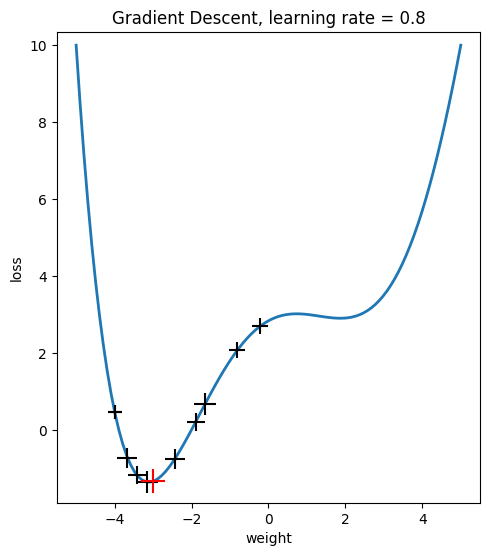

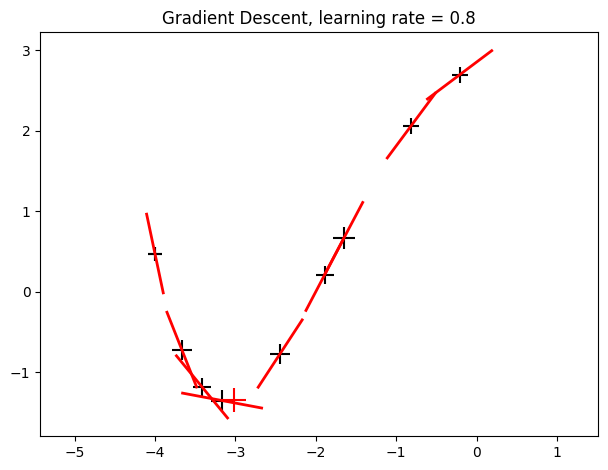

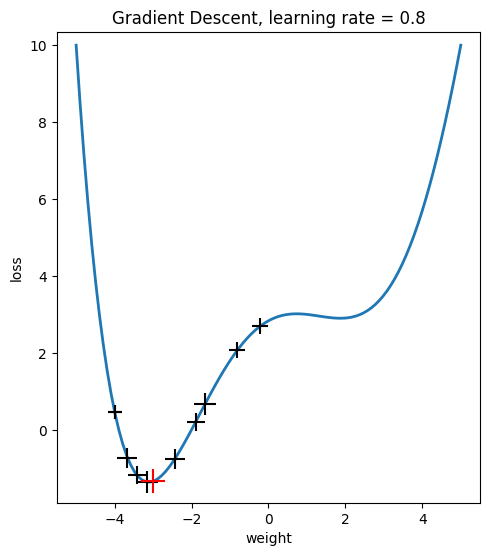

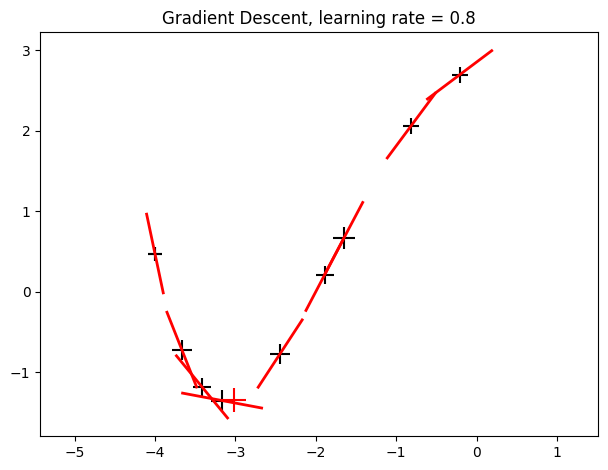

In [6]:
start_value = -4
learning_rate = 0.8

animation_all(
    poly,
    poly_deriv,
    start_value,
    learning_rate,
    10,
    OUTPUT_FOLDER / "gradient_descent_hesitant.mp4",
)
animation_all(
    poly,
    poly_deriv,
    start_value,
    learning_rate,
    10,
    OUTPUT_FOLDER / "gradient_descent_hesitant.gif",
)

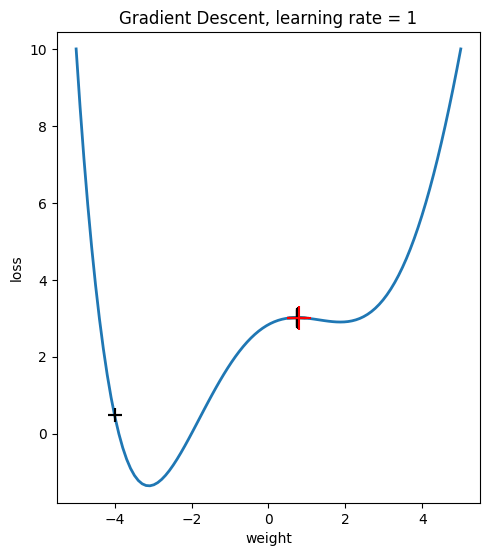

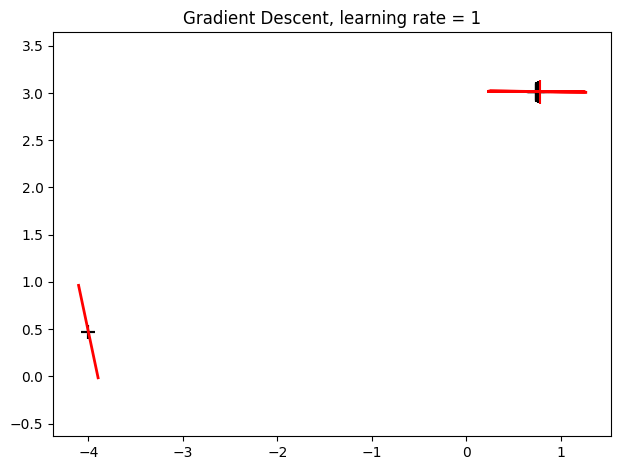

In [7]:
start_value = -4
learning_rate = 1

animation_all(
    poly,
    poly_deriv,
    start_value,
    learning_rate,
    10,
    OUTPUT_FOLDER / "gradient_descent_failed.gif",
)

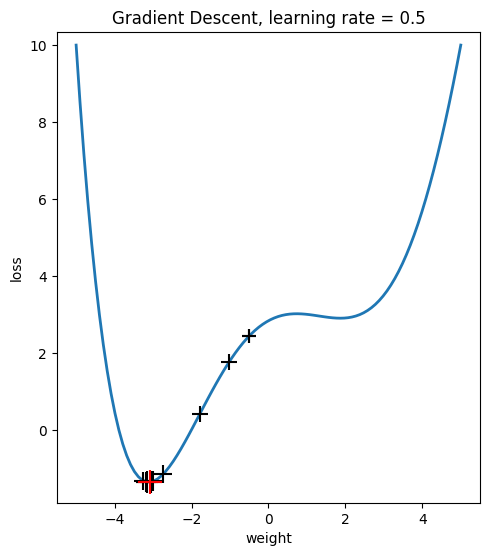

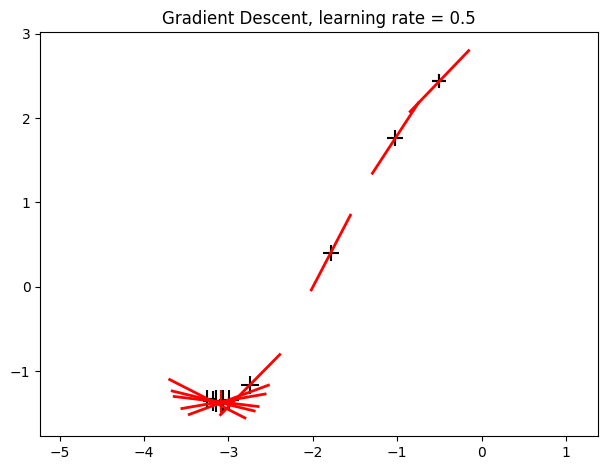

In [8]:
current_value = -0.5
learning_rate = 0.5
animation_all(
    poly,
    poly_deriv,
    current_value,
    learning_rate,
    10,
    OUTPUT_FOLDER / "gradient_descent_successful_2.gif",
)

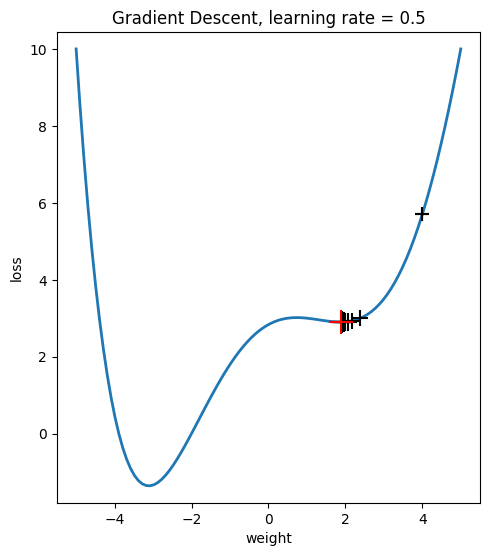

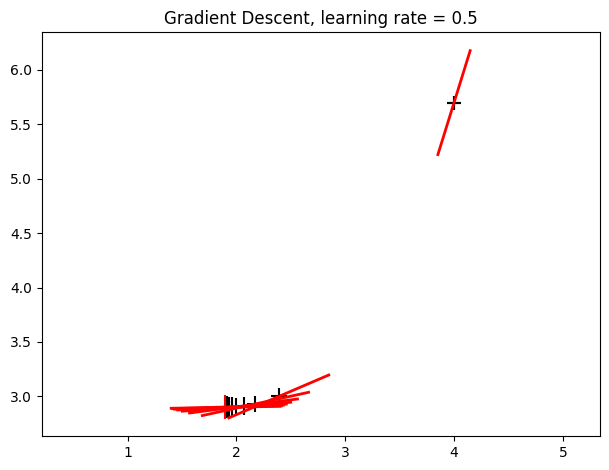

In [9]:
start_value = 4
learning_rate = 0.5
animation_all(
    poly,
    poly_deriv,
    start_value,
    learning_rate,
    10,
    OUTPUT_FOLDER / "gradient_descent_failed_2.gif",
)

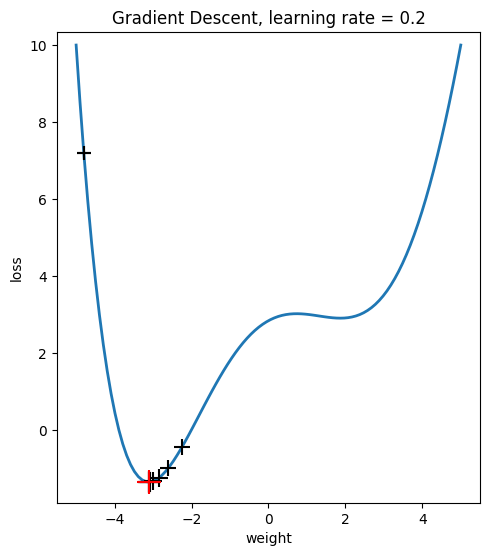

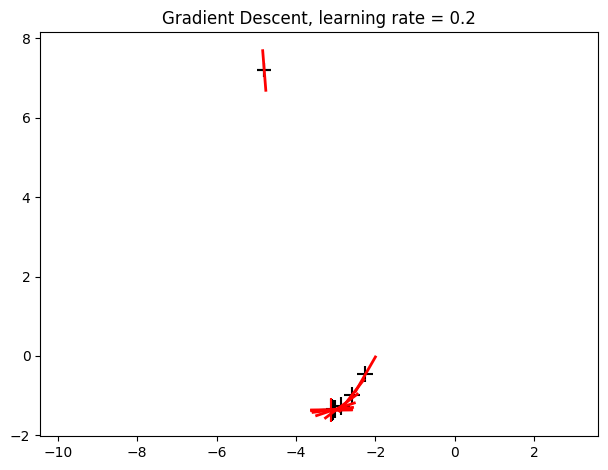

In [10]:
start_value = -4.8
learning_rate = 0.2

animation_all(
    poly,
    poly_deriv,
    start_value,
    learning_rate,
    10,
    OUTPUT_FOLDER / "gradient_descent_successful_3.gif",
)

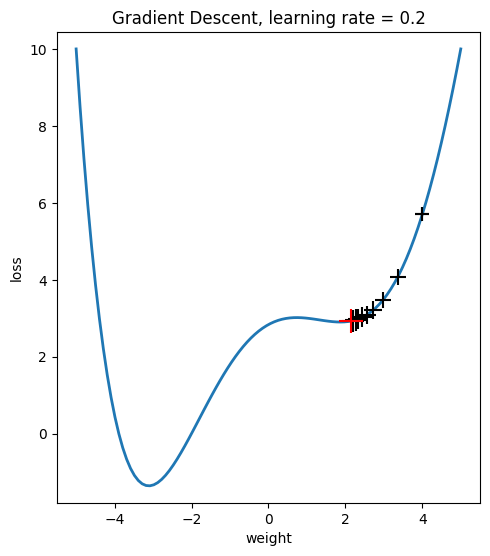

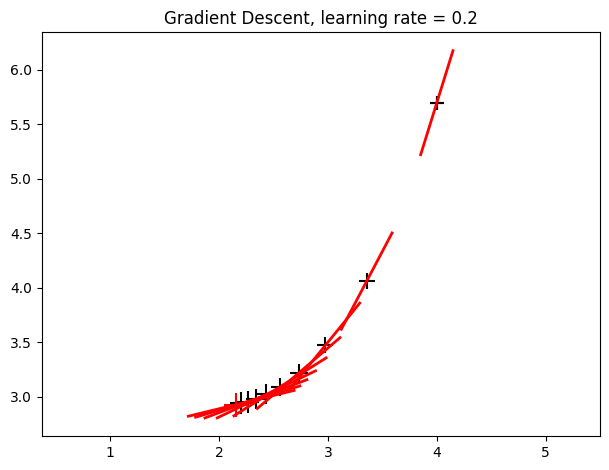

In [11]:
start_value = 4
learning_rate = 0.2

animation_all(
    poly,
    poly_deriv,
    start_value,
    learning_rate,
    10,
    OUTPUT_FOLDER / "gradient_descent_failed_3.gif",
)